In [94]:
# Y=a+b0x0+b1x1+...+bnxn   Multiple

In [95]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Libraries for Backward Elimination
import statsmodels.formula.api as sm
import statsmodels.api as sm



In [96]:
df=pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [97]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [98]:
# Importing datasets
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

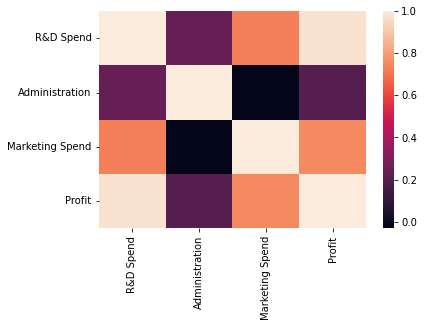

In [99]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [100]:
# Encoding Categorical Data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [101]:
x=x[:,1:]   #Dummy Variable Arrangement

In [102]:
# Splitting the dataset into the Training set and Test set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

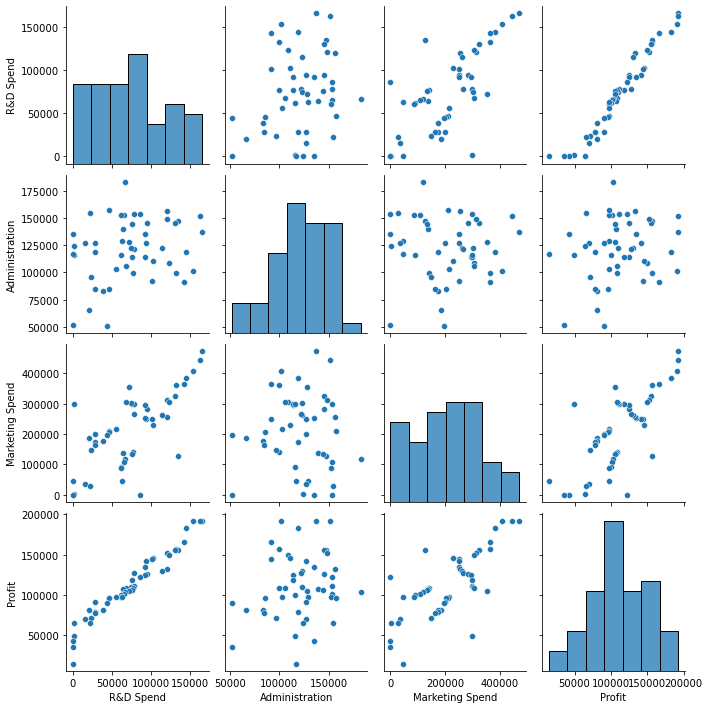

In [103]:
sns.pairplot(df)

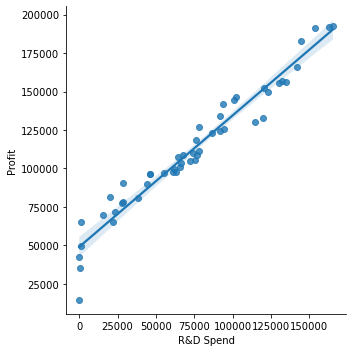

In [104]:
# Create a linear regression plot between the R&D spend and profit
sns.lmplot(x="R&D Spend", y="Profit", data=df)

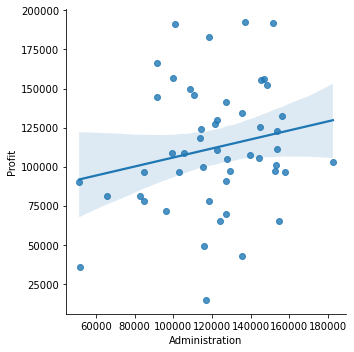

In [105]:
# Create a linear regression plot between the administration spend and profit
sns.lmplot(x="Administration", y="Profit", data=df)


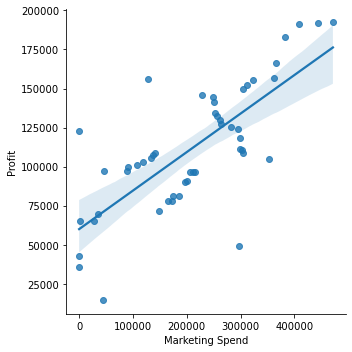

In [106]:
# Create a linear regression plot between the marketing spend and profit
sns.lmplot(x="Marketing Spend", y="Profit", data=df)

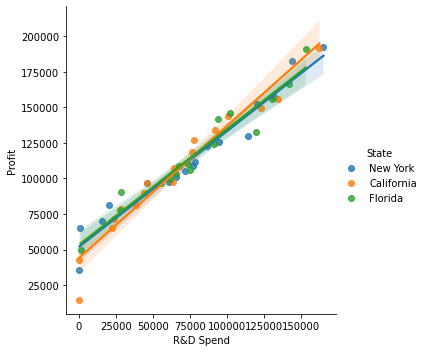

In [107]:

# Create a linear regression plot between all the independent variables and profit
sns.lmplot(x="R&D Spend", y="Profit", hue="State", data=df)


# Display the plots
plt.show()

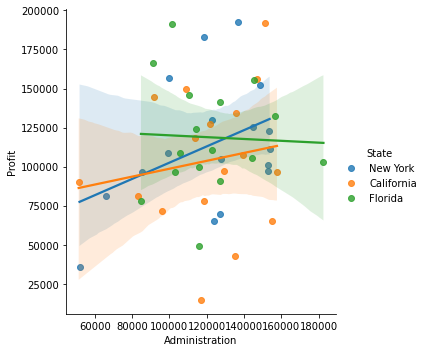

In [108]:
sns.lmplot(x="Administration", y="Profit", hue="State", data=df)


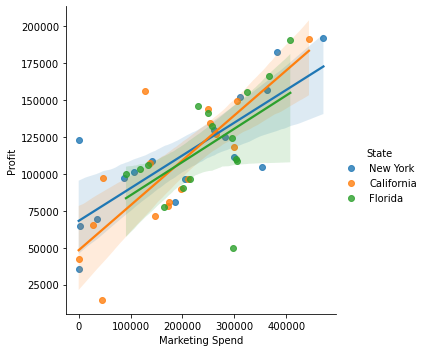

In [109]:
sns.lmplot(x="Marketing Spend", y="Profit", hue="State", data=df)


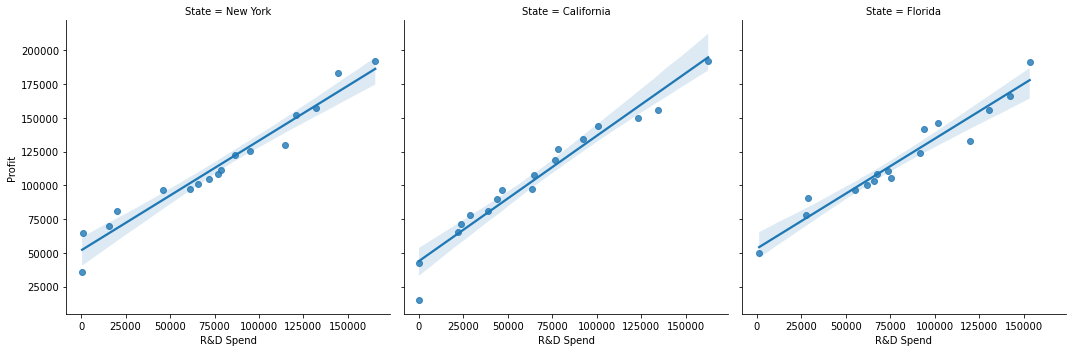

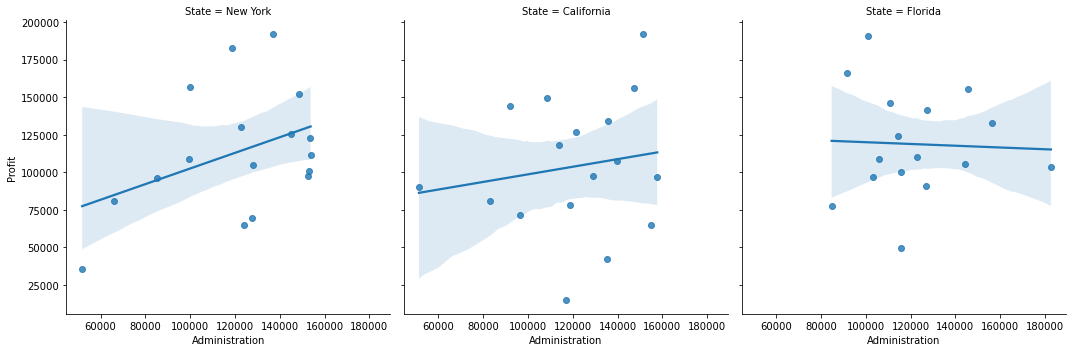

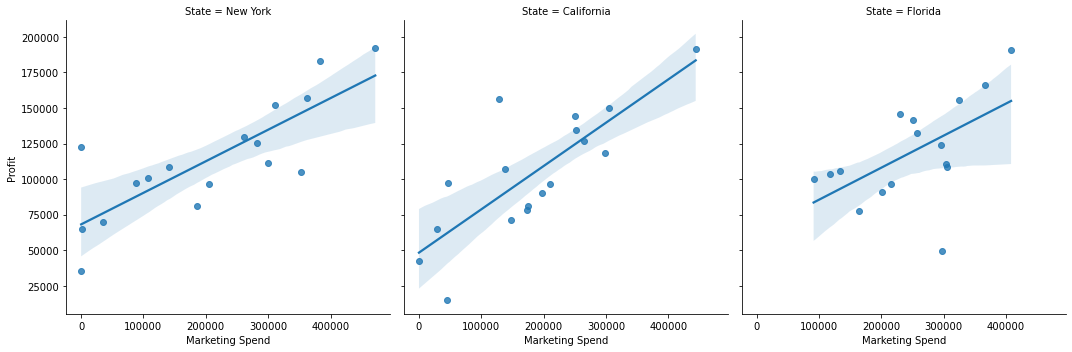

In [110]:
sns.lmplot(x="R&D Spend", y="Profit", col="State", data=df)
sns.lmplot(x="Administration", y="Profit", col="State", data=df)
sns.lmplot(x="Marketing Spend", y="Profit", col="State", data=df)

# Training the Multiple Linear Regression model on the Training set

In [111]:
regre=LinearRegression()
regre.fit(x_train,y_train)

LinearRegression()

In [112]:
y_pred=regre.predict(x_test)
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [113]:
# Predicting the test set results

y_pred = regre.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [114]:
# Y=a+b0x0+b1x1+...+bnxn   Multiple

regre.coef_


array([-9.59e+02,  6.99e+02,  7.73e-01,  3.29e-02,  3.66e-02])

In [115]:
regre.intercept_

42554.16761772438

In [116]:
r2_score(y_test,y_pred)

0.9347068473282446

# Backward Elimination method

In [117]:
x=np.append(arr=np.ones((50,1)).astype(int),values=x,axis=1)
x

array([[1, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1, 1.0, 0.0, 9

In [118]:

# generate some random data
x = np.random.rand(100, 5)
y = np.random.rand(100)

In [119]:
# replace missing or infinite values
x[np.isnan(x)] = 0
x[np.isinf(x)] = np.max(x[np.isfinite(x)])
y[np.isnan(y)] = 0
y[np.isinf(y)] = np.max(y[np.isfinite(y)])

In [120]:

# check for missing or infinite values
print(np.isnan(x).any())
print(np.isinf(x).any())
print(np.isnan(y).any())
print(np.isinf(y).any())


False
False
False
False


In [121]:

# check data types and shapes
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100, 5)
(100,)


In [122]:

# fit the OLS model
x_op = x[:, [0, 1, 2, 3, 4]]
OLS = sm.OLS(endog=y, exog=x_op).fit()
print(OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              56.19
Date:                Wed, 10 May 2023   Prob (F-statistic):                    7.03e-27
Time:                        21:26:54   Log-Likelihood:                         -18.017
No. Observations:                 100   AIC:                                      46.03
Df Residuals:                      95   BIC:                                      59.06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [123]:

x_op=x[:,[0,1,2,3]] 
OLS=sm.OLS(endog=y,exog=x_op).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              68.34
Date:                Wed, 10 May 2023   Prob (F-statistic):                    2.98e-27
Time:                        21:26:54   Log-Likelihood:                         -19.423
No. Observations:                 100   AIC:                                      46.85
Df Residuals:                      96   BIC:                                      57.27
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3166      0.090      3.531      0.001       0.139       0.495
x2             0.1287      0.094      1.372      0.173      -0.058       0.315
x3             0.2120      0.102      2.077      0.041       0.009       0.415
x4             0.2885      0.095      3.045      0.003       0.100       0.477
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.246
Skew:                          -0.049   Prob(JB):                        0.884
Kurtosis:                       2.778   Cond. No.                         4.14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:

x_op=x[:,[0,1,2]]  
OLS=sm.OLS(endog=y,exog=x_op).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              81.11
Date:                Wed, 10 May 2023   Prob (F-statistic):                    2.45e-26
Time:                        21:26:54   Log-Likelihood:                         -24.034
No. Observations:                 100   AIC:                                      54.07
Df Residuals:                      97   BIC:                                      61.88
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4100      0.088      4.672      0.000       0.236       0.584
x2             0.2263      0.092      2.464      0.016       0.044       0.409
x3             0.3056      0.101      3.014      0.003       0.104       0.507
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.353
Skew:                          -0.012   Prob(JB):                        0.838
Kurtosis:                       2.710   Cond. No.                         3.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:

x_op=x[:,[0,3]] 
OLS=sm.OLS(endog=y,exog=x_op).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              121.0
Date:                Wed, 10 May 2023   Prob (F-statistic):                    3.35e-27
Time:                        21:26:55   Log-Likelihood:                         -24.589
No. Observations:                 100   AIC:                                      53.18
Df Residuals:                      98   BIC:                                      58.39
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4255      0.087      4.915      0.000       0.254       0.597
x2             0.4690      0.079      5.927      0.000       0.312       0.626
==============================================================================
Omnibus:                        0.475   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.533
Skew:                          -0.159   Prob(JB):                        0.766
Kurtosis:                       2.835   Cond. No.                         2.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""